###  Created by Luis A. Sanchez-Perez (alejand@umich.edu).
<p><span style="color:green"><b>Copyright &#169;</b> Do not distribute or use without authorization from author.</span></p>

### Convolution
Shows the convolution operation performed in a convolution layer in a CNN. Visit [this](http://scs.ryerson.ca/~aharley/vis/conv/flat.html) for an interesting example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import toys
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
img = np.array([
    [0,0,0,0,0,0,0],
    [0,1,0,0,0,1,0],
    [0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0],
    [0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0],
])

In [3]:
img.shape

(7, 7)

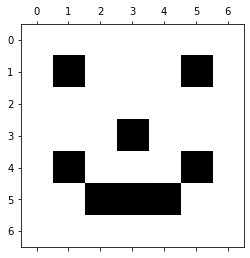

In [4]:
plt.matshow(img,cmap='binary')

In [5]:
kernel = np.array([
    [0,0,1],
    [1,0,0],
    [0,1,1]    
])

In [6]:
kernel.shape

(3, 3)

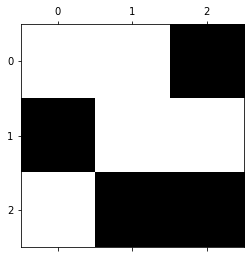

In [7]:
plt.matshow(kernel,cmap='binary')

In [8]:
result = toys.conv_2d(img,kernel,stride=1)

In [9]:
result.shape

(7, 7)

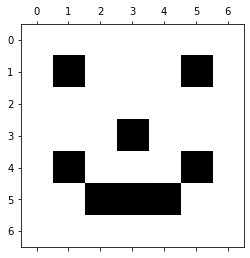

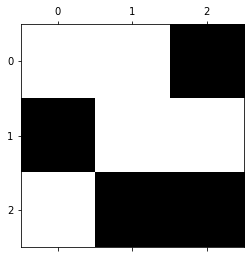

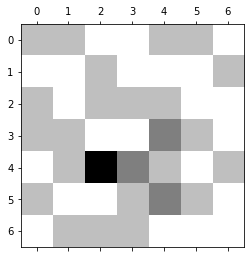

In [10]:
plt.matshow(img,cmap='binary')
plt.matshow(kernel,cmap='binary')
plt.matshow(result,cmap='binary')

In [11]:
datafile = sio.loadmat('../../datasets/classification/mnist/emnist-digits.mat')
labels = datafile['dataset'][0][0]['train'][0][0]['labels']
images = datafile['dataset'][0][0]['train'][0][0]['images']

In [12]:
filtered = images[labels.flatten() == 4]
index = np.random.randint(0, filtered.shape[0])
digit = filtered[index, :]
digit = digit.reshape(28,28,order='F')
digit = digit / 255.

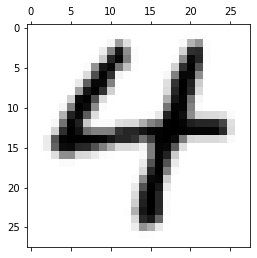

In [13]:
plt.matshow(digit, cmap='binary')

In [14]:
digit.shape

(28, 28)

In [15]:
kernel = np.zeros((5,5))
kernel[:,2] = 1

In [16]:
kernel.shape

(5, 5)

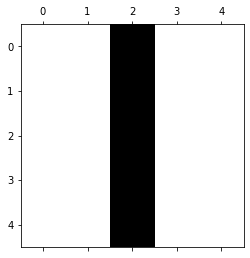

In [17]:
plt.matshow(kernel, cmap='binary')

In [18]:
result = toys.conv_2d(digit, kernel, stride=1, mode='same')

In [19]:
result.shape

(28, 28)

In [20]:
output_tf = tf.nn.conv2d(
    np.expand_dims(digit, (0, -1)),
    filters=np.expand_dims(np.expand_dims(kernel, -1), -1),
    padding='SAME',
    strides=1
)
result_tf = tf.squeeze(output_tf).numpy()

In [21]:
result_tf.shape

(28, 28)

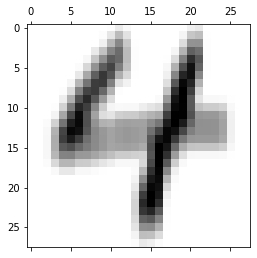

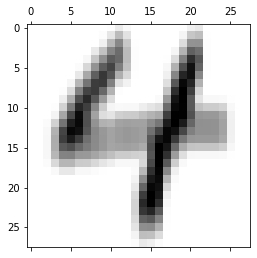

In [22]:
plt.matshow(result, cmap='binary')
plt.matshow(result_tf, cmap='binary')

In [23]:
kernel = np.zeros((5,5))
kernel[2,:] = 1

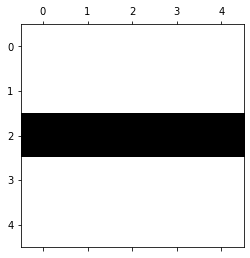

In [24]:
plt.matshow(kernel, cmap='binary')

In [25]:
result = toys.conv_2d(digit, kernel, stride=1)

In [26]:
result.shape

(28, 28)

In [27]:
output_tf = tf.nn.conv2d(
    np.expand_dims(digit, (0, -1)),
    filters=np.expand_dims(np.expand_dims(kernel, -1), -1),
    padding='SAME',
    strides=1
)
result_tf = tf.squeeze(output_tf).numpy()

In [28]:
result_tf.shape

(28, 28)

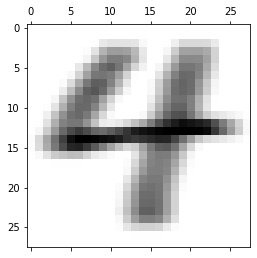

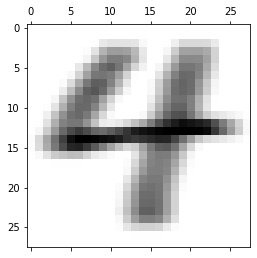

In [29]:
plt.matshow(result, cmap='binary')
plt.matshow(result_tf, cmap='binary')